In [2]:
import pandas as pd
import numpy as np
import scipy
import string
import operator
from contextlib import contextmanager
from string import capwords

In [3]:
from contextlib import contextmanager
from string import capwords

In [4]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
crime = pd.read_csv('../train.csv')

In [6]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
def plot_bar(df, title, filename):
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    bar = df.plot(kind='barh',
                  title=title,
                  fontsize=8,
                  figsize=(12,8),
                  stacked=False,
                  width=1,
                  colors = sns.color_palette(np.random.choice(p), len(df)),
    )

    bar.figure.savefig(filename)
    
    pylab.show()

In [8]:
def plot_top_crimes(df, column, title, fname, items=0):
    df.columns     = df.columns.map(operator.methodcaller('lower'))
    by_col         = df.groupby(column)
    col_freq       = by_col.size()
    if 'NONE' in col_freq.keys():
        del(col_freq['NONE'])
    col_freq.index = col_freq.index.map(capwords)

    col_freq.sort(ascending=True, inplace=True)
    plot_bar(col_freq[slice(-1, - items, -1)], title, fname)

/Users/sanghamitra_deb/SanFranciscoCrime/_notebook/lib/python2.7/site-packages/pandas/tools/plotting.py:856: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


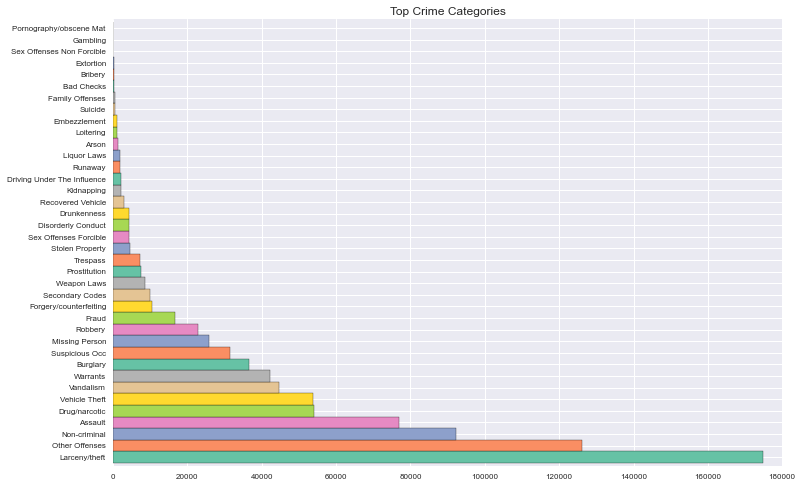

In [9]:
plot_top_crimes(crime, 'category',   'Top Crime Categories',        'category.png')

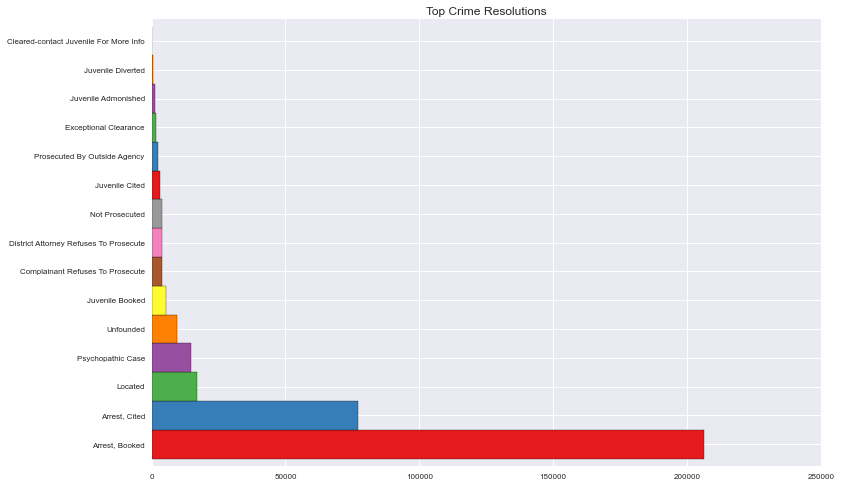

In [10]:
plot_top_crimes(crime, 'resolution', 'Top Crime Resolutions',       'resolution.png')

In [14]:
cff = crime.groupby(['pddistrict','category'])
cc = cff.count()

In [12]:
from collections import defaultdict
cnt=0
neib_cat={}

Lets do some pandas. We will create a two-dimensional dictionary with "Type of Crime" and "PdDistrict"

In [15]:
cnt = 0
d_now = defaultdict()
neib_cat={}
for nn,vv in zip(cc.index,cc.address.values):
    if (nn[0] == cc.index.levels[0][cnt]):
        neib = nn[0]
        
        d_now[nn[1]] = vv
    neib_cat[nn[0]] = d_now
    if (nn[0] != cc.index.levels[0][cnt]):
        cnt += 1
        d_now = defaultdict()

In [16]:
df = pd.DataFrame(neib_cat)

In [17]:
df  

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
ARSON,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASSAULT,9857,6977,8533,11149,8318,3515,3202,12183,5463,7679
BAD CHECKS,34,65,32,46,54,15,31,74,36,19
BRIBERY,56,12,53,66,18,7,8,37,17,15
BURGLARY,3930,4519,3331,3745,5854,2888,2696,4841,3463,1488
DISORDERLY CONDUCT,219,494,171,1099,452,271,108,511,162,833
DRIVING UNDER THE INFLUENCE,179,160,206,357,260,176,319,306,202,103
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
DRUNKENNESS,243,517,190,782,368,374,149,959,259,439
EMBEZZLEMENT,100,180,78,124,131,50,43,275,94,91


Let us pick out the top 20 crimes in the city

In [18]:
n = len(df.index)
d_cat = {}
for i in xrange(n):
    d_cat[df.index[i]]=df.iloc[i].sum()

In [20]:
imp_crimes = [a for a, b in sorted(d_cat.iteritems(), key=lambda item: item[1], reverse=True)[:20]]

Which crimes effect you the most? Find neighborhoods that you should avoid for these crimes.

In [23]:
#Find the index of the highest occuring crimes.

ind = map(lambda y: [i for i,x in enumerate(df.index)if x == y]\
          [0],d_cat_sorted.keys())

Let us look at which neighborhoods are most crime prone.

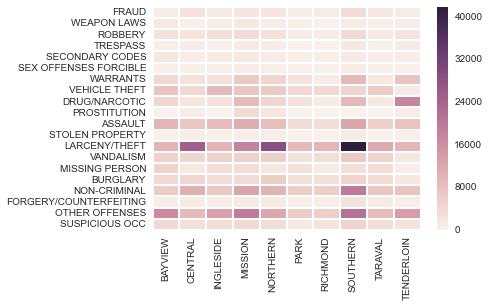

In [24]:
sns.heatmap(df.ix[ind],  linewidths=.5)

What are the crime prone hours of the day?

In [39]:
import datetime
dates = pd.to_datetime(crime.dates)


crime['hour'] = map(lambda x:x.hour,dates)

In [41]:
cr_hour = crime.groupby(['hour','pddistrict'])


In [97]:
def create2Ddf(df):
    cc=df.count()
    cnt = 0
    d_now = defaultdict()
    neib_cat={}
    for nn,vv in zip(cc.index,cc.address.values):
        if (nn[0] == cc.index.levels[0][cnt]):
            neib = nn[0]
        
            d_now[nn[1]] = vv
        neib_cat[nn[0]] = d_now
        if (nn[0] != cc.index.levels[0][cnt]):
            cnt += 1
            d_now = defaultdict()
    df_out = pd.DataFrame(neib_cat)
    return df_out

In [98]:
neib_hour = create2Ddf(cr_hour)

In [99]:
neib_hour = neib_hour.transpose()
neib_hour.keys()

Index([u'BAYVIEW', u'CENTRAL', u'INGLESIDE', u'MISSION', u'NORTHERN', u'PARK',
       u'RICHMOND', u'SOUTHERN', u'TARAVAL', u'TENDERLOIN'],
      dtype='object')

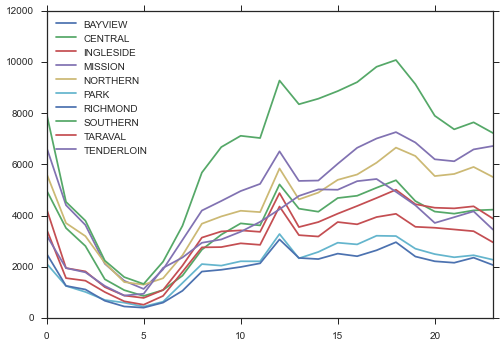

In [135]:
#What hours are the most dangerous?

neib_hour.plot()

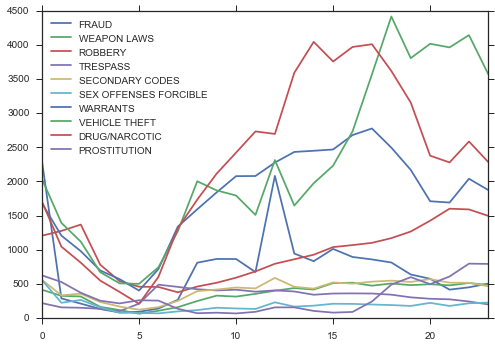

In [138]:
#What type of crime happens in which hour
cr_cat = crime.groupby(['hour','category'])
cat_hour = create2Ddf(cr_cat)
cat_hour = cat_hour.ix[ind[0:10]].transpose()
cat_hour.plot()


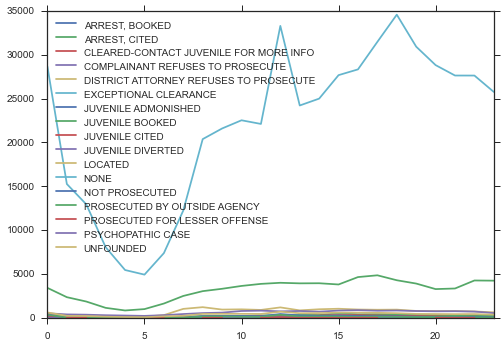

In [143]:
#How is crime resolution as function of hour

cr_res = crime.groupby(['hour','resolution'])
cat_res = create2Ddf(cr_res)
cat_res = cat_res.transpose()
cat_res.plot()

In [100]:
neib_hour['RICHMOND']

0     2507
1     1249
2     1107
3      666
4      443
5      396
6      594
7     1056
8     1808
9     1878
10    1987
11    2130
12    3065
13    2340
14    2297
15    2509
16    2408
17    2640
18    2956
19    2396
20    2210
21    2153
22    2351
23    2063
Name: RICHMOND, dtype: float64

In [101]:
d={}
neib = []
count_neib = []
hh = []
for kk in neib_hour.keys():
    count = neib_hour[kk]
    #print count.values
    for idx,vv in zip(count.index,count.values):
        #print vv
        neib+=[kk]
        count_neib+=[vv]
        hh+=[idx]

d['hour'] = hh
d['count'] = count_neib
d['District'] = neib

df_multi = pd.DataFrame(d)
        

In [133]:
df_multi

,District,count,hour
0,BAYVIEW,4041,0
1,BAYVIEW,NaN,1
2,BAYVIEW,NaN,2
3,BAYVIEW,NaN,3
4,BAYVIEW,NaN,4
5,BAYVIEW,NaN,5
6,BAYVIEW,NaN,6
7,BAYVIEW,NaN,7
8,BAYVIEW,NaN,8
9,BAYVIEW,NaN,9


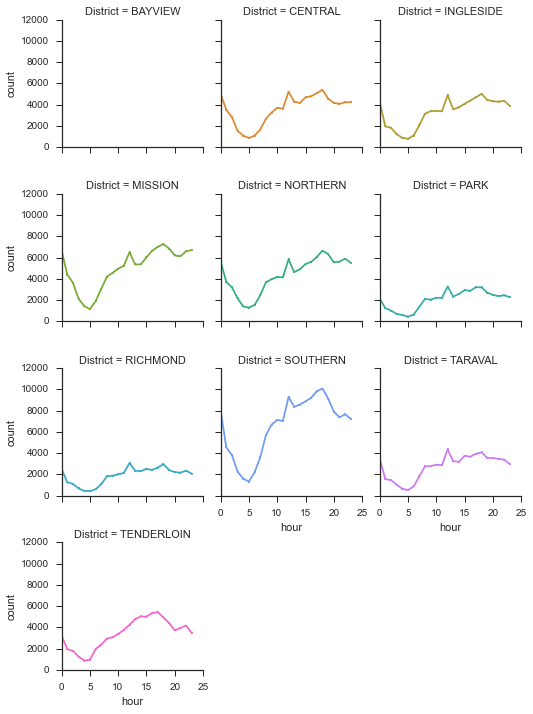

In [130]:
sns.set(style="ticks")
#sns.set(style="white")
grid = sns.FacetGrid(df_multi, col='District', hue='District', col_wrap=3,  size=2.5, aspect=1)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c="0.5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "hour", "count", marker="o", ms=2)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

### Some questions:
Is the mission safe during midnight during weekends?

What districts are particularly bad for "DRUG and Narcotics"?

What is the most common type of resolution for "Larceny and Theft"?

If you own a car (vehicle theft) what are the best districts to live in?

Have there been specific days(aggregate over dates) in when the total  crime/specific crime type was either too high or too low?